In [1]:
import numpy as np;
import pandas as  pd;
import matplotlib.pyplot as plt;
import scipy as sp;
import sklearn as sk;

In [2]:
vic = pd.read_csv("C:/Users/karth/Documents/Victoria real estate.csv");
vic.head();
#keeping necessary columns in dataset:
vic = vic.drop(['latitude','longitude','streetAddress','suburb','propertyType','listingId','title','dateSold','modifiedDate'], axis=1);

In [3]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,"$1,255,000"
1,3226,bellarine_peninsula,4,2,2,"$725,000"
2,3064,melbourne___northern_region,4,2,2,"$670,000"
3,3215,NaN,3,2,1,"$600,000"
4,3218,bellarine_peninsula,3,1,2,"$520,000"


In [4]:
#dimensions of new data frame:

null_columns = vic.isnull().sum();
print(null_columns);
#shape of the data frame:
shape = vic.shape;
print(shape);

postcode            0
region           5242
bedrooms            0
bathrooms           0
parkingSpaces       0
price               0
dtype: int64
(105120, 6)


In [5]:
#removing dollar sign from price column:
pprice = vic.price.str.replace('$','');
pprice.head()

0    1,255,000 
1      725,000 
2      670,000 
3      600,000 
4      520,000 
Name: price, dtype: object

In [6]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,"$1,255,000"
1,3226,bellarine_peninsula,4,2,2,"$725,000"
2,3064,melbourne___northern_region,4,2,2,"$670,000"
3,3215,NaN,3,2,1,"$600,000"
4,3218,bellarine_peninsula,3,1,2,"$520,000"


In [7]:
pprice.shape

(105120,)

In [8]:
#removing the old price column in the vic df with new pprice column:
vic = vic.drop(['price'],axis = 1);
vic.head();

In [9]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces
0,3227,bellarine_peninsula,3,2,2
1,3226,bellarine_peninsula,4,2,2
2,3064,melbourne___northern_region,4,2,2
3,3215,NaN,3,2,1
4,3218,bellarine_peninsula,3,1,2


In [10]:
#adding a new column pprice to the vic df:
vic['price']= pprice

In [11]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,"1,255,000"
1,3226,bellarine_peninsula,4,2,2,"725,000"
2,3064,melbourne___northern_region,4,2,2,"670,000"
3,3215,NaN,3,2,1,"600,000"
4,3218,bellarine_peninsula,3,1,2,"520,000"


In [12]:
vic["price"]= vic["price"].str.replace(",","")

In [13]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,1255000
1,3226,bellarine_peninsula,4,2,2,725000
2,3064,melbourne___northern_region,4,2,2,670000
3,3215,NaN,3,2,1,600000
4,3218,bellarine_peninsula,3,1,2,520000


In [14]:
#data types of columns in vic df:
datatypes = vic.dtypes;
print("data types of columns in vic df:");
print(datatypes);

data types of columns in vic df:
postcode          int64
region           object
bedrooms          int64
bathrooms         int64
parkingSpaces     int64
price            object
dtype: object


In [15]:
#changing data types of some columns in the df:
vic = vic.astype({"postcode":'category', "bedrooms":'category',"bathrooms":'category',"parkingSpaces":'category'});

In [16]:
datatypes = vic.dtypes;
print(datatypes);


postcode         category
region             object
bedrooms         category
bathrooms        category
parkingSpaces    category
price              object
dtype: object


In [17]:
vic.shape

(105120, 6)

In [18]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,1255000
1,3226,bellarine_peninsula,4,2,2,725000
2,3064,melbourne___northern_region,4,2,2,670000
3,3215,NaN,3,2,1,600000
4,3218,bellarine_peninsula,3,1,2,520000


In [19]:
#removing "contact agent" from price:
vic = vic[vic.price != "Contact agent"];



In [20]:
vic.shape

(105105, 6)

In [21]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,1255000
1,3226,bellarine_peninsula,4,2,2,725000
2,3064,melbourne___northern_region,4,2,2,670000
3,3215,NaN,3,2,1,600000
4,3218,bellarine_peninsula,3,1,2,520000


In [22]:
#removing price column:
price = vic[['price']];

In [23]:
price.head()

,price
0,1255000
1,725000
2,670000
3,600000
4,520000


In [24]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces,price
0,3227,bellarine_peninsula,3,2,2,1255000
1,3226,bellarine_peninsula,4,2,2,725000
2,3064,melbourne___northern_region,4,2,2,670000
3,3215,NaN,3,2,1,600000
4,3218,bellarine_peninsula,3,1,2,520000


In [25]:
vic = vic.drop(['price'],axis = 1);


In [26]:
vic.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces
0,3227,bellarine_peninsula,3,2,2
1,3226,bellarine_peninsula,4,2,2
2,3064,melbourne___northern_region,4,2,2
3,3215,NaN,3,2,1
4,3218,bellarine_peninsula,3,1,2


In [27]:
datatypes = vic.dtypes;
print(datatypes);

postcode         category
region             object
bedrooms         category
bathrooms        category
parkingSpaces    category
dtype: object


In [28]:
#splitting the df into 2:
#one part where region is not NaN and one where region is NaN.
nan_region = pd.isnull(vic["region"]);
region_nan = vic[nan_region]

In [29]:
region_nan.shape

(5241, 5)

In [30]:
region_nan.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces
3,3215,NaN,3,2,1
27,3030,NaN,3,2,2
77,3216,NaN,4,2,1
83,3215,NaN,3,1,2
124,3216,NaN,3,1,2


In [31]:
#second part where region is not nan:

region_not_nan = vic.loc[vic['region'].notnull()];


In [32]:
region_not_nan.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces
0,3227,bellarine_peninsula,3,2,2
1,3226,bellarine_peninsula,4,2,2
2,3064,melbourne___northern_region,4,2,2
4,3218,bellarine_peninsula,3,1,2
5,3234,south_western_region,3,2,3


In [33]:
region_not_nan.shape

(99864, 5)

In [34]:
#we now have 2 dfs and we can predict the region for one df using the other.
#use region_not_nan as training set with 'region' as the class label
#unique categories in 'region' column:
region_not_nan['region'].unique()

array(['bellarine_peninsula', 'melbourne___northern_region',
       'south_western_region', 'south_west_melbourne',
       'south_east_melbourne', 'mornington_peninsula',
       'eastern_melbourne', 'western_region', 'western_melbourne',
       'gippsland', 'north_west_melbourne', 'northern_region',
       'inner_east_melbourne', 'north_east_region', 'bayside',
       'melbourne_city___greater_region'], dtype=object)

In [35]:
#LDA model to predict regions:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
region = region_not_nan[['region']];
region_not_nan_noregion = region_not_nan.drop(['region'],axis = 1); 


In [37]:
X = np.array(region_not_nan_noregion);
y = np.array(region);
clf = LinearDiscriminantAnalysis();
clf.fit(X,np.ravel(y,order='C'))
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [38]:
#predicting the region for the df with NaN region values:
region_nan_noregion = region_nan.drop(['region'],axis = 1);

In [39]:
region_nan_noregion.head()

,postcode,bedrooms,bathrooms,parkingSpaces
3,3215,3,2,1
27,3030,3,2,2
77,3216,4,2,1
83,3215,3,1,2
124,3216,3,1,2


In [40]:
#print(clf.predict(region_nan_noregion))

pred_region = clf.predict(region_nan_noregion);
print(pred_region);
print(2)

#convert pred_region to a df:
pred_regions = pd.DataFrame(pred_region, columns=['region']);

['bellarine_peninsula' 'south_west_melbourne' 'eastern_melbourne' ...
 'western_region' 'western_region' 'western_region']
2


In [41]:
pred_regions.shape

(5241, 1)

In [42]:
#combining 'pred_regions' and 'region_nan_noregion':


In [43]:
region_nan_noregion.head()

,postcode,bedrooms,bathrooms,parkingSpaces
3,3215,3,2,1
27,3030,3,2,2
77,3216,4,2,1
83,3215,3,1,2
124,3216,3,1,2


In [44]:
pred_regions.head()

,region
0,bellarine_peninsula
1,south_west_melbourne
2,eastern_melbourne
3,bellarine_peninsula
4,bellarine_peninsula


In [45]:
region_not_nan.head()

,postcode,region,bedrooms,bathrooms,parkingSpaces
0,3227,bellarine_peninsula,3,2,2
1,3226,bellarine_peninsula,4,2,2
2,3064,melbourne___northern_region,4,2,2
4,3218,bellarine_peninsula,3,1,2
5,3234,south_western_region,3,2,3


In [46]:
#giving 'region_nan_noregion' indices to 'pred_regions':
pred_regions1 = pd.DataFrame(pred_region, columns=['region'], index = region_nan_noregion.index);

In [47]:
pred_regions1.head()

,region
3,bellarine_peninsula
27,south_west_melbourne
77,eastern_melbourne
83,bellarine_peninsula
124,bellarine_peninsula


In [48]:
#combining 'pred_regions' and 'region_nan_noregion':
nan_region = pd.concat([region_nan_noregion,pred_regions1], axis=1)

In [49]:
nan_region.head()

,postcode,bedrooms,bathrooms,parkingSpaces,region
3,3215,3,2,1,bellarine_peninsula
27,3030,3,2,2,south_west_melbourne
77,3216,4,2,1,eastern_melbourne
83,3215,3,1,2,bellarine_peninsula
124,3216,3,1,2,bellarine_peninsula


In [50]:
#head of price df:
price

,price
0,1255000
1,725000
2,670000
3,600000
4,520000
...,...
105115,356000
105116,355000
105117,345000
105118,340000


In [51]:
#prediction of region where they were previously missing is done.
#combining 'region_not_nan' and 'nan_region' dfs to get the data set:
vicdata = pd.concat([region_not_nan, nan_region])


C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
vicdata.head()

,bathrooms,bedrooms,parkingSpaces,postcode,region
0,2,3,2,3227,bellarine_peninsula
1,2,4,2,3226,bellarine_peninsula
2,2,4,2,3064,melbourne___northern_region
4,1,3,2,3218,bellarine_peninsula
5,2,3,3,3234,south_western_region


In [53]:
vicdata.shape

(105105, 5)

In [54]:
#combining 'vicdata' and 'price' dfs:
vicre = pd.concat([vicdata, price], axis=1)


In [55]:
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price
0,2,3,2,3227,bellarine_peninsula,1255000
1,2,4,2,3226,bellarine_peninsula,725000
2,2,4,2,3064,melbourne___northern_region,670000
3,2,3,1,3215,bellarine_peninsula,600000
4,1,3,2,3218,bellarine_peninsula,520000
...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000
105116,1,1,1,3051,melbourne_city___greater_region,355000
105117,2,4,2,3690,north_east_region,345000
105118,1,3,1,3981,south_east_melbourne,340000


In [56]:
#we now have the full dataset to perform regression and classification with price as the target variable
#splitting the data into train and test sets:
vicre.isnull().any()



bathrooms        False
bedrooms         False
parkingSpaces    False
postcode         False
region           False
price            False
dtype: bool

In [57]:
vicre.dtypes

bathrooms        category
bedrooms         category
parkingSpaces    category
postcode         category
region             object
price              object
dtype: object

In [58]:
#converting 'region' to a categorical and 'price' to an integer:
vicre = vicre.astype({"region":'category', "price":'int64'});

In [59]:
vicre.dtypes

bathrooms        category
bedrooms         category
parkingSpaces    category
postcode         category
region           category
price               int64
dtype: object

In [60]:
#how to deal with categorical variables for linear regression
###############
sample_data = [[1,2,'a'],[3,4,'b'],[5,6,'c'],[7,8,'b']]
dff = pd.DataFrame(sample_data, columns=['numeric1','numeric2','cat'])
dummies = pd.get_dummies(dff.cat)
dff.join(dummies)
###############

,numeric1,numeric2,cat,a,b,c
0,1,2,a,1,0,0
1,3,4,b,0,1,0
2,5,6,c,0,0,1
3,7,8,b,0,1,0


In [61]:
#one hot encoding for categorical variables:
#the variables to be encoded are: bathrooms, bedrooms, parkingSpaces and region:
#postcode has too many categories, so, we'll use the other 4 predictors.
#reducing number of categories in postcode variable will make it like the region column and having 2 similar columns is redundant.
vicre1 = vicre
dummies1 = pd.get_dummies(vicre1.bathrooms, prefix = 'bathrooms')
vicre1 = vicre1.join(dummies1)
vicre1


,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,0,0


In [62]:
dummies2 = pd.get_dummies(vicre1.bedrooms, prefix = 'bedrooms')
vicre1 = vicre1.join(dummies2)
vicre1

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,...,bathrooms_5,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_13
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
dummies3 = pd.get_dummies(vicre1.parkingSpaces, prefix = 'ps')
vicre1 = vicre1.join(dummies3)
vicre1

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,...,ps_2,ps_3,ps_4,ps_5,ps_6,ps_7,ps_8,ps_10,ps_12,ps_14
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
dummies4 = pd.get_dummies(vicre1.region, prefix = 'region')
vicre1 = vicre1.join(dummies4)
vicre1

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,...,region_melbourne_city___greater_region,region_mornington_peninsula,region_north_east_region,region_north_west_melbourne,region_northern_region,region_south_east_melbourne,region_south_west_melbourne,region_south_western_region,region_western_melbourne,region_western_region
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price
0,2,3,2,3227,bellarine_peninsula,1255000
1,2,4,2,3226,bellarine_peninsula,725000
2,2,4,2,3064,melbourne___northern_region,670000
3,2,3,1,3215,bellarine_peninsula,600000
4,1,3,2,3218,bellarine_peninsula,520000
...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000
105116,1,1,1,3051,melbourne_city___greater_region,355000
105117,2,4,2,3690,north_east_region,345000
105118,1,3,1,3981,south_east_melbourne,340000


In [66]:
vicre1

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,...,region_melbourne_city___greater_region,region_mornington_peninsula,region_north_east_region,region_north_west_melbourne,region_northern_region,region_south_east_melbourne,region_south_west_melbourne,region_south_western_region,region_western_melbourne,region_western_region
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
#we now have a one hot encoded df for the predictor variables
vicre1

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,...,region_melbourne_city___greater_region,region_mornington_peninsula,region_north_east_region,region_north_west_melbourne,region_northern_region,region_south_east_melbourne,region_south_west_melbourne,region_south_western_region,region_western_melbourne,region_western_region
0,2,3,2,3227,bellarine_peninsula,1255000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,725000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,670000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,600000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,520000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105116,1,1,1,3051,melbourne_city___greater_region,355000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
105117,2,4,2,3690,north_east_region,345000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
105118,1,3,1,3981,south_east_melbourne,340000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
#splitting data into train and test sets:
#first we isolate the target variable ie price from the 'vicre1' df
price_label = vicre1[['price']];

In [69]:
price_label.shape

(105105, 1)

In [70]:
#Removing 'price' fron 'vicre1':
vicre1 = vicre1.drop(['price'],axis = 1)

In [71]:
vicre1.head()

,bathrooms,bedrooms,parkingSpaces,postcode,region,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,...,region_melbourne_city___greater_region,region_mornington_peninsula,region_north_east_region,region_north_west_melbourne,region_northern_region,region_south_east_melbourne,region_south_west_melbourne,region_south_western_region,region_western_melbourne,region_western_region
0,2,3,2,3227,bellarine_peninsula,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,2,3226,bellarine_peninsula,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,2,3064,melbourne___northern_region,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,3215,bellarine_peninsula,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,2,3218,bellarine_peninsula,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split

#split 'vicre1' and 'price_label' into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(vicre1, price_label, test_size=0.2, random_state=41)

In [73]:
#perform linear regression on the training set:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(X_train)


# applying linear regression:
model = LinearRegression()
model.fit(X_transform, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
vicre.dtypes

bathrooms        category
bedrooms         category
parkingSpaces    category
postcode         category
region           category
price               int64
dtype: object

In [75]:
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price
0,2,3,2,3227,bellarine_peninsula,1255000
1,2,4,2,3226,bellarine_peninsula,725000
2,2,4,2,3064,melbourne___northern_region,670000
3,2,3,1,3215,bellarine_peninsula,600000
4,1,3,2,3218,bellarine_peninsula,520000
...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000
105116,1,1,1,3051,melbourne_city___greater_region,355000
105117,2,4,2,3690,north_east_region,345000
105118,1,3,1,3981,south_east_melbourne,340000


In [76]:
#Classification on df by categorizing 'price' variable:
#range of 'price':
vicre.describe(include=[np.number])

,price
count,1.051050e+05
mean,4.207794e+05
std,7.567071e+04
min,1.725000e+05
25%,3.760000e+05
50%,4.470000e+05
75%,4.600000e+05
max,6.100000e+06


In [77]:
#dividing price into 3 categories:
#172500 to 376000, 376000 to 460000 and 460000 to 6100000.
#an example cut using qcut fucntion:
vicre['exampleCut'] = pd.qcut(vicre['price'], q=4, precision=0)


In [78]:
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,exampleCut
0,2,3,2,3227,bellarine_peninsula,1255000,"(460000, 6100000]"
1,2,4,2,3226,bellarine_peninsula,725000,"(460000, 6100000]"
2,2,4,2,3064,melbourne___northern_region,670000,"(460000, 6100000]"
3,2,3,1,3215,bellarine_peninsula,600000,"(460000, 6100000]"
4,1,3,2,3218,bellarine_peninsula,520000,"(460000, 6100000]"
...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,"(172499, 376000]"
105116,1,1,1,3051,melbourne_city___greater_region,355000,"(172499, 376000]"
105117,2,4,2,3690,north_east_region,345000,"(172499, 376000]"
105118,1,3,1,3981,south_east_melbourne,340000,"(172499, 376000]"


In [79]:
vicre = vicre.drop(['exampleCut'],axis = 1)
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price
0,2,3,2,3227,bellarine_peninsula,1255000
1,2,4,2,3226,bellarine_peninsula,725000
2,2,4,2,3064,melbourne___northern_region,670000
3,2,3,1,3215,bellarine_peninsula,600000
4,1,3,2,3218,bellarine_peninsula,520000
...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000
105116,1,1,1,3051,melbourne_city___greater_region,355000
105117,2,4,2,3690,north_east_region,345000
105118,1,3,1,3981,south_east_melbourne,340000


In [80]:
#labels of the ctaegories:
bin_labels = ['low','mid','mid-high','high']
vicre['price_category'] = pd.qcut(vicre['price'], q=4, precision=0, labels=bin_labels)
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region,price,price_category
0,2,3,2,3227,bellarine_peninsula,1255000,high
1,2,4,2,3226,bellarine_peninsula,725000,high
2,2,4,2,3064,melbourne___northern_region,670000,high
3,2,3,1,3215,bellarine_peninsula,600000,high
4,1,3,2,3218,bellarine_peninsula,520000,high
...,...,...,...,...,...,...,...
105115,1,2,1,3818,gippsland,356000,low
105116,1,1,1,3051,melbourne_city___greater_region,355000,low
105117,2,4,2,3690,north_east_region,345000,low
105118,1,3,1,3981,south_east_melbourne,340000,low


In [81]:
vicre.describe(include=['category'])
#checking counts of categories in 'price_category':
vicre['price_category'].value_counts()
#we see that there is not much class imbalance.

low         31323
mid         26100
mid-high    26051
high        21631
Name: price_category, dtype: int64

In [82]:
#dropping unnecessary columns:
dup_vicre = vicre
vicre = vicre.drop(['price'],axis = 1)

In [83]:
#classification on the vicre df using different methods:
#splitting into test and train sets:
#isolating 'price_category' variable as the target variable:
price_category = vicre[['price_category']]
vicre = vicre.drop(['price_category'],axis = 1)


In [84]:
vicre

,bathrooms,bedrooms,parkingSpaces,postcode,region
0,2,3,2,3227,bellarine_peninsula
1,2,4,2,3226,bellarine_peninsula
2,2,4,2,3064,melbourne___northern_region
3,2,3,1,3215,bellarine_peninsula
4,1,3,2,3218,bellarine_peninsula
...,...,...,...,...,...
105115,1,2,1,3818,gippsland
105116,1,1,1,3051,melbourne_city___greater_region
105117,2,4,2,3690,north_east_region
105118,1,3,1,3981,south_east_melbourne


In [85]:
price_category

,price_category
0,high
1,high
2,high
3,high
4,high
...,...
105115,low
105116,low
105117,low
105118,low


In [86]:
#train and test splits:
vic_train, vic_test, pc_train, pc_test = train_test_split(vicre, price_category, test_size=0.2, random_state=40)

In [87]:
#levels in region:
vicre['region'].value_counts()

western_region                     31303
north_east_region                  15628
bellarine_peninsula                10489
melbourne_city___greater_region    10458
gippsland                          10429
melbourne___northern_region         5404
eastern_melbourne                   5318
south_east_melbourne                5291
inner_east_melbourne                5289
north_west_melbourne                5257
bayside                               61
mornington_peninsula                  54
south_west_melbourne                  38
northern_region                       32
western_melbourne                     31
south_western_region                  23
Name: region, dtype: int64

In [88]:
#converting a string categorical variable into a numerical categorical variable:
#dictionary for conversion:
dictionaryy = {"region": {"western_region":1,"north_east_region":2,"bellarine_peninsula":3,
                         "melbourne_city___greater_region":4,"gippsland":5,"melbourne___northern_region":6,
                         "eastern_melbourne":7,"south_east_melbourne":8,"inner_east_melbourne":9,"north_west_melbourne":10,
                         "bayside":11,
                         "mornington_peninsula":12,"south_west_melbourne":13,"northern_region":14,"western_melbourne":15,
                         "south_western_region":16}}


In [89]:
vic_train.replace(dictionaryy, inplace = True)
vic_test.replace(dictionaryy, inplace = True)

C:\Users\karth\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [90]:
#convert region to a categorical for both vic train and test sets:
vic_train = vic_train.astype({"region":'category'})
vic_test = vic_test.astype({"region":'category'})


In [91]:
#LDA MODEL ON THE TRAIN SET:


In [92]:
clf = LinearDiscriminantAnalysis();
clf.fit(vic_train,np.ravel(pc_train,order='C'))
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [93]:
pred_pc = clf.predict(vic_test)
print(pred_pc)
print(3)
pc_test

['low' 'mid-high' 'low' ... 'mid-high' 'low' 'mid']
3


,price_category
55393,mid
9634,low
9513,mid
103845,mid-high
18167,mid-high
...,...
4683,high
26558,low
48945,mid-high
48277,low


In [94]:
#convert pred_region to a df:
#pred_regions = pd.DataFrame(pred_region, columns=['region']);
#converting pc_test to an array:
pc_test_array = pc_test['price_category'].to_numpy()

In [95]:
pc_test_array
#we now have test set array and predicted values array
#we can now check the accuracy and confusion matrix of the model:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(pc_test_array, pred_pc)
print(acc_score)
#confusion matrix:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(pc_test_array, pred_pc)
print(con_mat)

0.6457352171637886
[[3193 1058    6   51]
 [   9 3174 1028 2077]
 [   2 1046 3087 1120]
 [   1    0 1049 4120]]


In [96]:
#LDA's accuracy is not that high and 3 of the 4 classes get misclassified pretty heavily.
#trying other classification methods:


In [97]:
#DECISION TREES:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(vic_train,np.ravel(pc_train,order='C'))


[Text(109.87720853365384, 211.4, 'X[3] <= 3012.5\ngini = 0.746\nsamples = 84084\nvalue = [17323, 25035, 20845, 20881]'),
 Text(12.340384615384615, 199.32, 'X[2] <= 1.5\ngini = 0.005\nsamples = 8311\nvalue = [19, 1, 8290, 1]'),
 Text(10.194230769230769, 187.24, 'X[3] <= 3005.0\ngini = 0.004\nsamples = 8305\nvalue = [13, 1, 8290, 1]'),
 Text(4.292307692307692, 175.16, 'X[2] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 0, 1]'),
 Text(2.146153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(6.438461538461539, 163.07999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'),
 Text(16.096153846153847, 175.16, 'X[4] <= 12.5\ngini = 0.002\nsamples = 8299\nvalue = [8, 1, 8290, 0]'),
 Text(10.73076923076923, 163.07999999999998, 'X[4] <= 7.0\ngini = 0.002\nsamples = 8296\nvalue = [6, 1, 8289, 0]'),
 Text(6.438461538461539, 151.0, 'X[1] <= 1.5\ngini = 0.003\nsamples = 4205\nvalue = [6, 0, 4199, 0]'),
 Text(4.292307692307692, 138.92000000000002, 'X[0] 

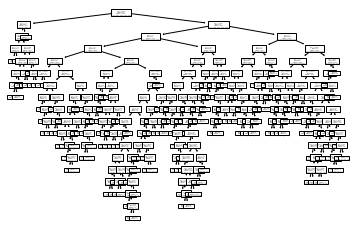

In [98]:
#plotting the tree:
tree.plot_tree(clf.fit(vic_train,np.ravel(pc_train,order='C')))

In [104]:
#decision tree predictions:
dt_pred_pc = clf.predict(vic_test)
dt_pred_pc


array(['mid', 'low', 'mid', ..., 'mid-high', 'low', 'low'], dtype=object)

In [106]:
#accuracy of the decision tree model:
dt_acc_score = accuracy_score(pc_test_array, dt_pred_pc)
print(dt_acc_score)
#decision tree gives a surprisingly very high accuracy of 99%.
#confusion matrix for the decision tree method:
dt_con_mat = confusion_matrix(pc_test_array, dt_pred_pc)
print(dt_con_mat)


0.9984301412872841
[[4298    3    4    3]
 [   3 6279    6    0]
 [   7    3 5243    2]
 [   1    0    1 5168]]


In [123]:
#RANDOM FOREST CLASSIFICATION MODEL:
#using default values for random forest classifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(random_state=2)
clf.fit(vic_train,np.ravel(pc_train,order='C'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

rfd_pred_pc = clf.predict(vic_test)
print(rfd_pred_pc)

#accuracy of the default rf model:
rfd_acc_score = accuracy_score(pc_test_array, rfd_pred_pc)
print(rfd_acc_score)
#confusion matrix of the default rf:
rfd_con_mat = confusion_matrix(pc_test_array, rfd_pred_pc)
print(rfd_con_mat)



C:\Users\karth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['mid' 'low' 'mid' ... 'mid-high' 'low' 'low']
0.9985728557157129
[[4302    1    5    0]
 [   4 6278    6    0]
 [   6    5 5243    1]
 [   1    0    1 5168]]


In [130]:
#class probabilities for default rf:
from sklearn.ensemble import RandomForestClassifier
rfd_probs = clf.predict_proba(vic_test)[:,1]
rfd_probs

In [136]:
price

,price
0,1255000
1,725000
2,670000
3,600000
4,520000
...,...
105115,356000
105116,355000
105117,345000
105118,340000
